In [1]:
# critical
import argparse
import os
import random
import time
import math

# data
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# signal processing
from scipy import signal
from scipy.stats import entropy

In [2]:
# set random seed for reproducibility
manualSeed = 99
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)

np.random.seed(manualSeed)

Random Seed:  99


In [3]:
generated_signals_df = pd.read_csv('../data/output/generated_signals_10000.csv', header=None)

### Generated Sample

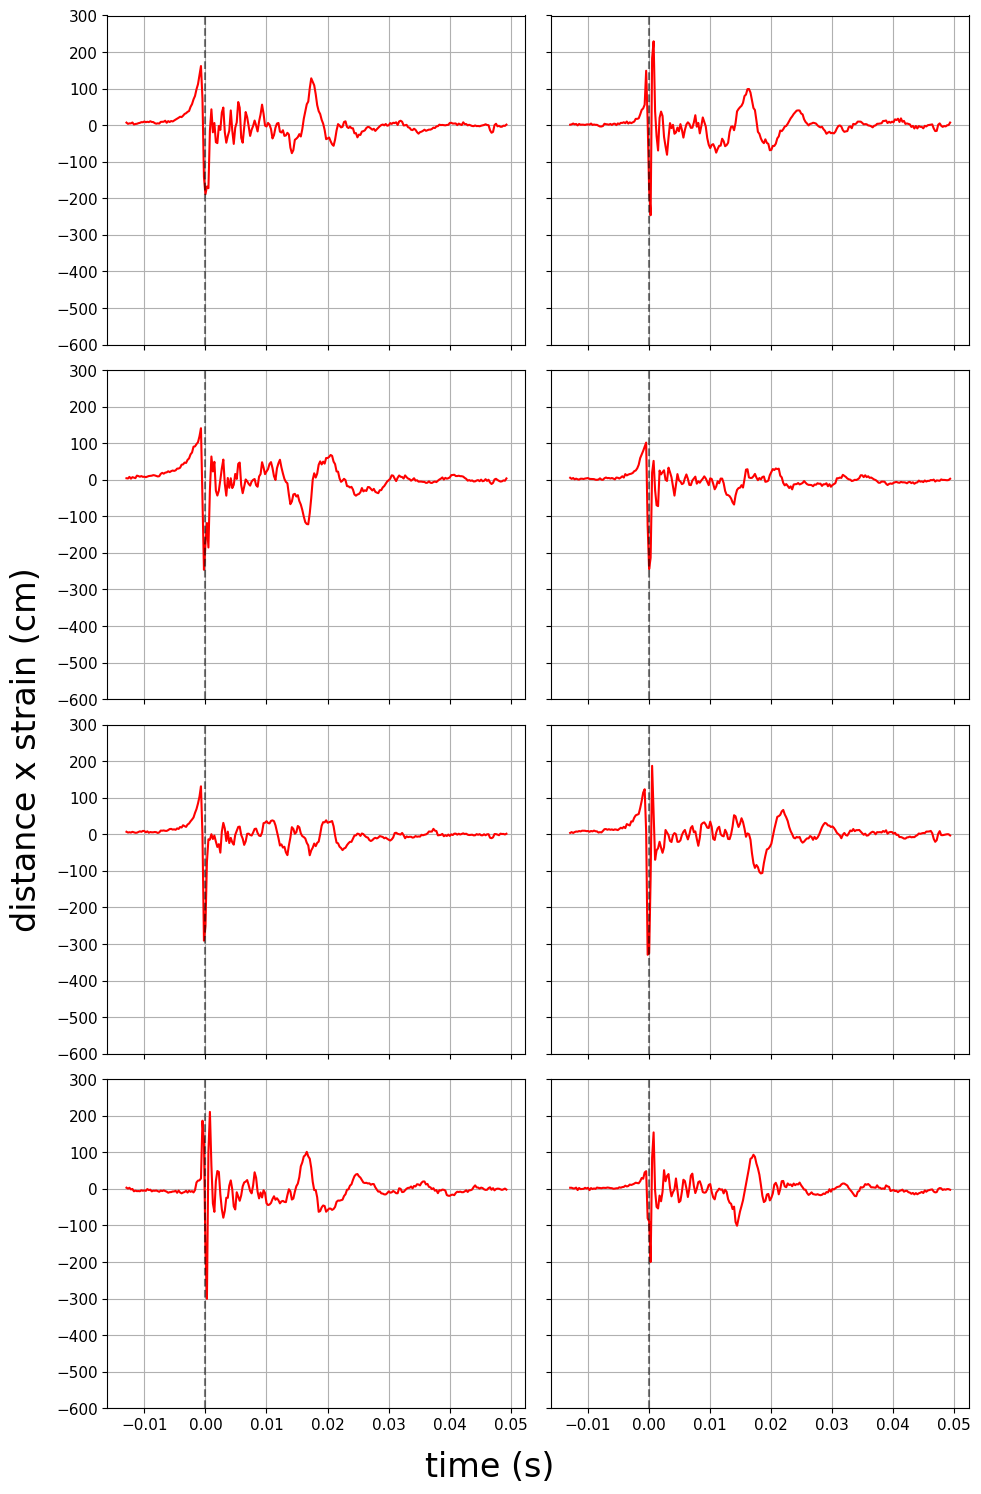

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set font size globally for all plots
plt.rcParams.update({'font.size': 11})

random_index = np.random.randint(0, generated_signals_df.shape[1], 8)
selected_signals = generated_signals_df.iloc[:, random_index]  # Assuming the first 64 columns are the signals

num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

axes = axes.flatten()

# plot each signal on a separate subplot
for i, ax in enumerate(axes):
    x = [i / 4096 for i in range(0, 256)]
    x = [value - (53/4096) for value in x]
    y = selected_signals.iloc[:, i]
    ax.set_ylim(-600, 300)
    ax.plot(x, y, color='red')

    ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax.grid(True)
    
    # Remove y-axis ticks for the right-hand column
    if i % num_cols == num_cols - 1:
        ax.yaxis.set_ticklabels([])
    
    # Remove x-axis tick labels for all but the bottom two plots
    if i <= 5:
        ax.xaxis.set_ticklabels([])

for i in range(len(selected_signals), num_rows*num_cols):
    fig.delaxes(axes[i])

# Add overall axis titles
fig.supxlabel('time (s)', fontsize=24)
fig.supylabel('distance x strain (cm)', fontsize=24)

plt.tight_layout()
# plt.savefig('../plots/generated_signals_sample_8.pdf')
plt.show()

### Generated Distribution

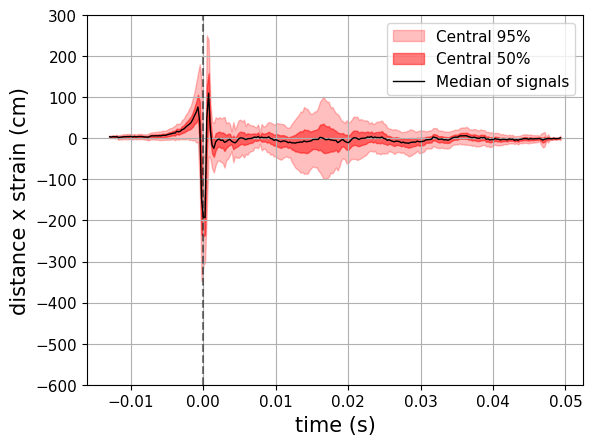

In [5]:
# Set font size globally for all plots
plt.rcParams.update({'font.size': 11})

# Compute median of signals
median_line = generated_signals_df.median(axis=1)

# Transform x values
x = [i / 4096 for i in range(0, 256)]
x = [value - (53/4096) for value in x]

# Compute central 95% interval
percentile_2_5 = generated_signals_df.quantile(0.025, axis=1)
percentile_97_5 = generated_signals_df.quantile(0.975, axis=1)
plt.fill_between(x, percentile_2_5, percentile_97_5, color='red', alpha=0.25, label='Central 95%')

# Compute central 50% interval
percentile_25 = generated_signals_df.quantile(0.25, axis=1)
percentile_75 = generated_signals_df.quantile(0.75, axis=1)
plt.fill_between(x, percentile_25, percentile_75, color='red', alpha=0.5, label='Central 50%')

plt.plot(x, median_line.values, color='k', linestyle='-', linewidth=1, alpha=1.0, label='Median of signals')

# The core bounce is at n = 203
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  

# Set the same y-axis limits
plt.ylim(-600, 300)

# Set the same x-axis labels and title
plt.xlabel('time (s)', size=15)
plt.ylabel('distance x strain (cm)', size=15)
# plt.title('Generated Stellar Core-Collapse Wave Signal Distribution', size=20)

plt.grid(True)

plt.legend()
# Save the figure
# plt.savefig('../plots/generated_signal_distribution_10000.pdf')
plt.show()
